___

# ICA: Image Compression with Singular Value Decomposition

In this ICA you will compress an image using SVD. Note that you need this notebook and the image file. The image file is called `tower.jpg` and is in D2L with this notebook.

___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from scipy import linalg

Some of you probably haven't worked with image data, so I'll walk you through the first steps. 

First, the basic idea of the ICA is to take a data matrix $X$ and perform SVD on it. We'll then try to make "good enough" versions of $X$ that are smaller. So that we can visualize what we are doing, the data matrix will be an image that we can view - a nice way to build intuition! 

The image file `tower.jpg` as you can see from the name is a JPEG file. There are many libraries in Python for working with such image files. Today, we will use the simplest option, which is the `image` library in `matplotlib` - see the `import` statement above. (If there is another Python library you like to use for images, feel free to use what you know and like.)

First, let's bring the image in and see what we have on our hands....

In [2]:
# import the image
X = image.imread('tower.jpg')

What is $X$? Let's take a look....

In [3]:
X

array([[[188, 223, 253],
        [188, 223, 253],
        [188, 223, 253],
        ...,
        [194, 228, 255],
        [194, 228, 255],
        [194, 228, 255]],

       [[188, 223, 253],
        [188, 223, 253],
        [188, 223, 253],
        ...,
        [194, 228, 255],
        [194, 228, 255],
        [195, 229, 255]],

       [[188, 223, 253],
        [188, 223, 253],
        [187, 224, 253],
        ...,
        [195, 229, 255],
        [195, 229, 255],
        [195, 229, 255]],

       ...,

       [[ 38,  42,  15],
        [ 32,  37,  15],
        [ 21,  25,  10],
        ...,
        [ 20,  13,   3],
        [ 16,   9,   0],
        [ 12,   5,   0]],

       [[ 10,  13,   0],
        [ 13,  17,   2],
        [ 16,  19,  10],
        ...,
        [ 22,  13,   4],
        [ 29,  20,  11],
        [ 19,  10,   1]],

       [[ 27,  30,  13],
        [  6,   9,   0],
        [  1,   3,   0],
        ...,
        [ 44,  35,  26],
        [ 32,  23,  14],
        [ 31,  23,  12]]

As you can see, the JPEG image is simply a multidimensional NumPy array! And, you can see that the values range from $0$ top $255$. 

The reason the array is multidimensional is that there are three color channels: red, green and blue. Let's look at it.

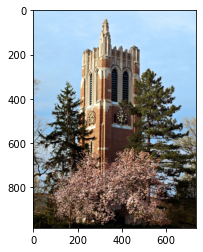

In [4]:
# plot the data matrix X
plt.imshow(X)

Let's pull out just the red channel and see that we have a "normal" data matrix. 

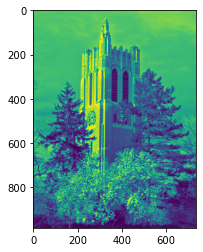

In [5]:
# make sure you know what this does
red_X = X[:,:,0]
plt.imshow(red_X)

In [6]:
red_X.shape

(984, 736)

Ok, now your turn!

Follow these steps:
* make data matrices $Y$ and $Z$ with the other two color channels,
* [find the SVDs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) of $X$, $Y$ and $Z$ using `SciPy` or `NumPy`,
* in a markdown cell describe the shape of what the SVD library returns,
* plot the singular values versus index (largest SV to smallest SV),
* find the [rank of the matrices](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html), and compare with the number of non-zero singular values - what do you find? 
* in your plot, use linear-linear and log-linear so that you can build your intuition on how SVs decay,
* compare SVs for the different color channels,
* look (print out or make an image) at the matrices $U$ and $V^T$,
* how do you pull the columns out of these?
* think about how to perform outer products with these columns.

I highly recommend not going past this point unless everything is clear. Find us if you have questions. 

Next, you are going to do a little math. Use the whiteboards and go through every step with the members of your group. Be sure everyone understands the steps. 

Recall that the SVD is:
$$X = U\Sigma V^T .$$

Write out what this explicitly. Note that because $\Sigma$ is diagonal the final expression isn't as complicated as it could be. For example, an interesting rule to know about matrix multiplication is that multiplication by a diagonal matrix gives multiplication of each row by the diagonal element. Prove this. This is what it might look like:
$$ \begin{bmatrix} \sigma_1v_{11} & \sigma_1v_{21} & \sigma_1v_{31} \\
\sigma_2v_{12} & \sigma_2v_{22} & \sigma_2v_{32}  \\
\sigma_3v_{13} & \sigma_3v_{23} & \sigma_3v_{33}  
\end{bmatrix} = \begin{bmatrix} \sigma_1 & 0 & 0  \\
0 & \sigma_2 & 0 \\
0 & 0& \sigma_3 
\end{bmatrix} \begin{bmatrix} v_{11} & v_{21} & v_{31}  \\
v_{12} & v_{22} & v_{32}  \\
v_{13} & v_{23} & v_{33}  
\end{bmatrix}
$$

In the end, you should be able to show that
$$X = \sum_{i=1}^r \sigma_i {\bf u}_i {\bf v}_i^T.$$
Read about it [here](https://en.wikipedia.org/wiki/Singular_value_decomposition). Note that the ${\bf u}_i$ and ${\bf v}_i$ refer to columns of $U$ and $V$, respectively. 

Importantly, think about what ${\bf v}_i^T$ is.

Finally, note that ${\bf u}_i {\bf v}_i^T$ is an outer product - what is the shape of this product? 

Make sure you understand all of the math before proceeding, or nothing will work! If you have questions, find us! 



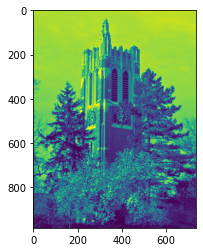

In [7]:
# data matrix green
green_X = X[:,:,1]
plt.imshow(green_X)

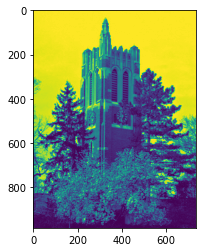

In [8]:
# data matrix blue
blue_X = X[:,:,2]
plt.imshow(blue_X)

In [9]:
# calculating SVD's for red, green and blue matrices
ur , sr, vtr = np.linalg.svd(red_X)
vr = vtr.T
ug , sg, vtg = np.linalg.svd(green_X)
vg = vtg.T
ub , sb, vtb = np.linalg.svd(blue_X)
vb = vtb.T

In [10]:
# Analysing Shape of the matrices got from the SVD
print(ur.shape, sr.shape, vtr.shape)
print(ug.shape, sg.shape, vtg.shape)
print(ub.shape, sb.shape, vtb.shape)


(984, 984) (736,) (736, 736)
(984, 984) (736,) (736, 736)
(984, 984) (736,) (736, 736)


The shape of the U matrix from the output of the SVD function is equal to (984,984) which is equal to MXM dimension.
The shape of the S matrix from the output of the SVD function is equal to (736) which is equal to N dimension of the picture .
The shape of the V matrix from the output of the SVD function is equal to (736,736) which is equal to NXN dimension.

This is equal in all different color matrix created above, as the shape of the image is same in all the cases.

In [11]:
# Plot of singular values vs index for red data matrix
plt.plot(sr)

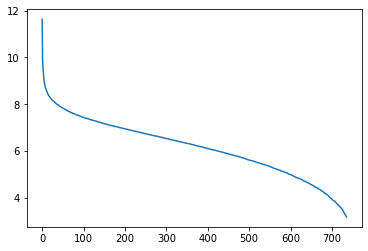

In [12]:
# Plot of log of singular values vs index for red data matrix
plt.plot(np.log(sr))

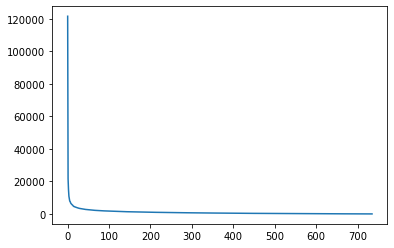

In [13]:
# Plot of singular values vs index for green data matrix
plt.plot(sg)

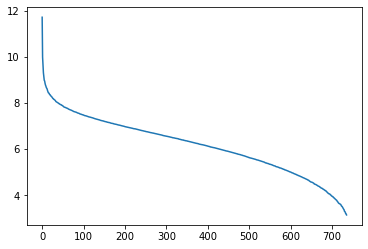

In [14]:
# Plot of log of singular values vs index for green data matrix
plt.plot(np.log(sg))

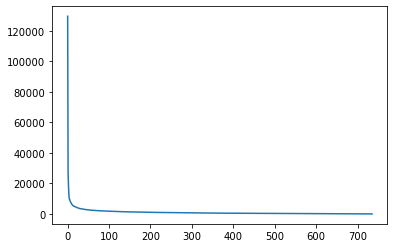

In [16]:
# Plot of singular values vs index for blue data matrix
plt.plot(sb)

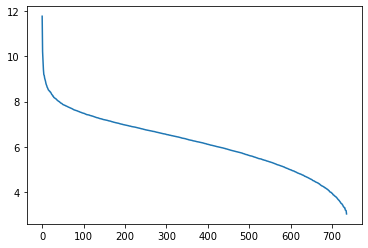

In [17]:
# Plot of log of singular values vs index for blue data matrix
plt.plot(np.log(sb))

The singular values vs index for all color matrices showed similar trend. We can say, the data can be efficiently compressed into 20 dimensions from 736. 

In [18]:
# Rank of matrix 
np.linalg.matrix_rank(red_X)

736

In [19]:
# Rank of matrix 
np.linalg.matrix_rank(green_X)

736

In [20]:
# Rank of matrix 
np.linalg.matrix_rank(blue_X)

736

The rank of matrices above is equal to length of non singular values obtained in SVD for all the colors

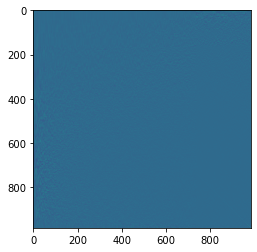

In [21]:
plt.imshow(ur)

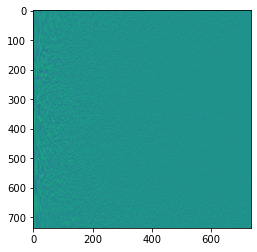

In [22]:
plt.imshow(vr)

To get the columns of our matrices, we will have to perform the outer product. The shape of the ${\bf u}_i {\bf v}_i^T$ will be equal to the shape of our color matrix, as it is a compressed version of the decomposed matrix. 

____

## Creating lower rank images. 

Now that you understand all of the math, let's make some new images! To make things easy, start with just $X$. You should have its SVD ready to go. 

From your plot of the SVs, you saw that the SVs decay quite rapidly. If you look at the sum you just derived, this means that only the first few terms are important. To start, let's assume that only $\sigma_1$ is important; it's by far the largest. Approximate $X$ as

$\tilde{X}_1 \approx \sigma_1 {\bf u}_1 {\bf v}_1^T.$

What shape is this matrix? 

Plot $\tilde{X}_1$ next to the original $X$, using `imshow`. Describe what you see. What is the rank of $\tilde{X}$? 

Ok, I think you can guess the next steps! Next, form 

$\tilde{X}_2 \approx \sigma_1 {\bf u}_1 {\bf v}_1^T + \sigma_2 {\bf u}_2 {\bf v}_2^T,$

and plot all three. How many SVs do you need until the approximate image looks close to the original? 



----

The shape of the $\sigma_1 {\bf u}_1 {\bf v}_1^T.$ matrix is equal to shape of the red color matrix, i.e. 984X736. 

The rank of the generated image is one


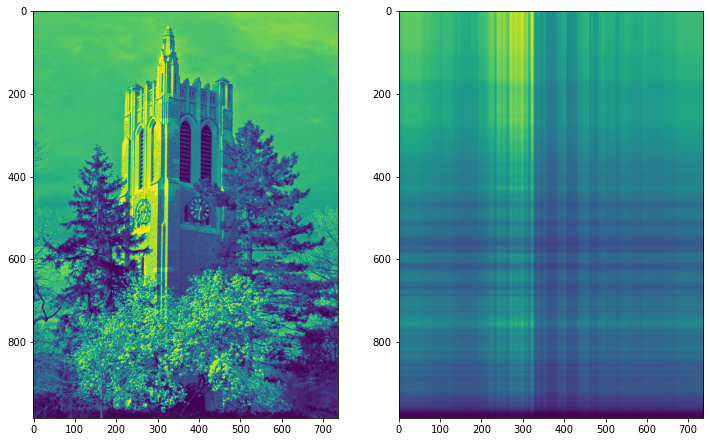

In [23]:
smaller = 0
a = 0
for i in range(1):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    smaller = smaller + a

f, axarr = plt.subplots(1,2,figsize=(12, 12))
axarr[0].imshow(red_X)
axarr[1].imshow(smaller)
print("The rank of the generated image is one")

The rank of the generated image is One and Two in sequence


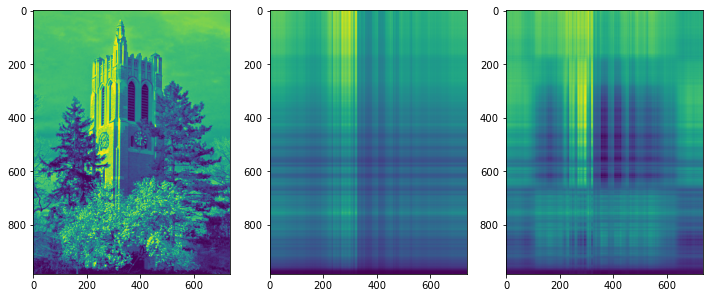

In [24]:
smaller1 = 0
a1 = 0
for i in range(2):
    a1 = sr[i]*np.outer(ur[:,i],vr[:,i])
    smaller1 = smaller1 + a1

f, axarr = plt.subplots(1,3,figsize=(12, 12))
axarr[0].imshow(red_X)
axarr[1].imshow(smaller)
axarr[2].imshow(smaller1)
print("The rank of the generated image is One and Two in sequence")

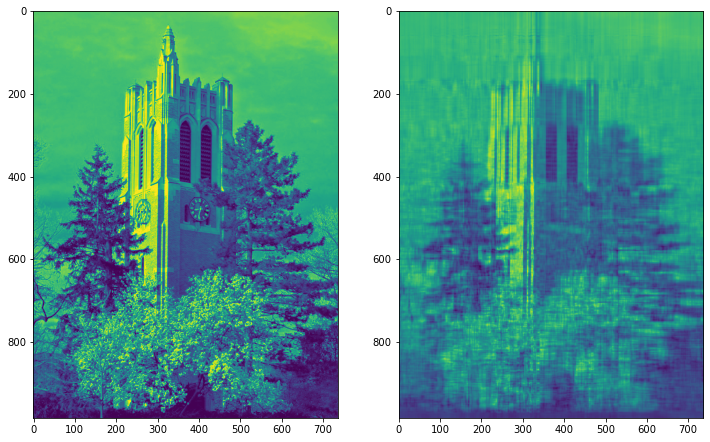

In [25]:
smaller = 0
a = 0
for i in range(20):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    smaller = smaller + a

f, axarr = plt.subplots(1,2,figsize=(12, 12))
axarr[0].imshow(red_X)
axarr[1].imshow(smaller)

With just 20 dimensions, we are able to generate high information of the image. Lets see what we get with different number of dimesions. 

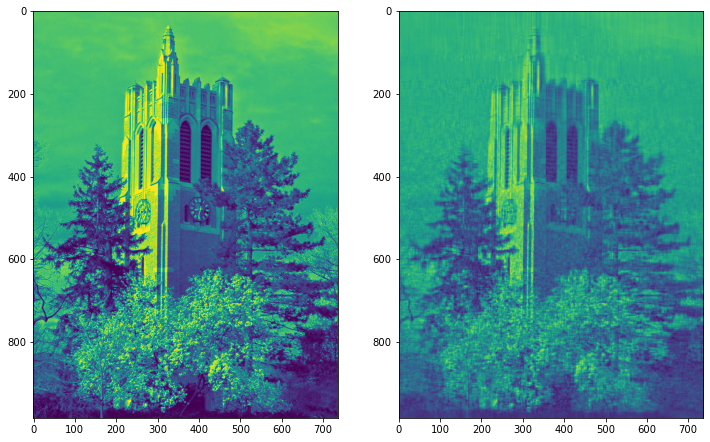

In [26]:
smaller = 0
a = 0
for i in range(50):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    smaller = smaller + a

f, axarr = plt.subplots(1,2,figsize=(12, 12))
axarr[0].imshow(red_X)
axarr[1].imshow(smaller)

Not bad, we have a clear image of our tower. But lets see how it changes further. 

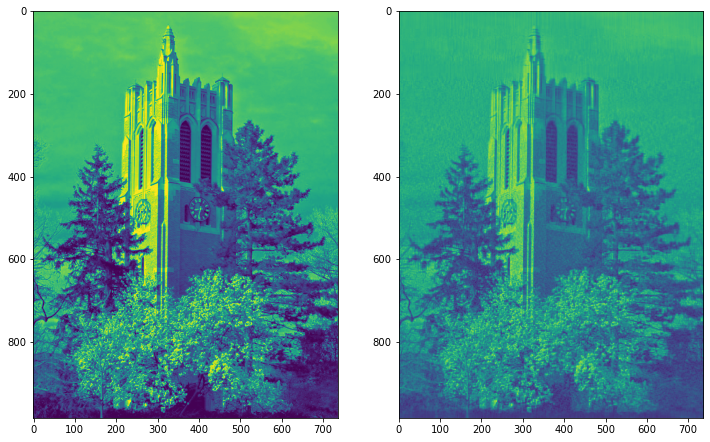

In [27]:
smaller = 0
a = 0
for i in range(100):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    smaller = smaller + a

f, axarr = plt.subplots(1,2,figsize=(12, 12))
axarr[0].imshow(red_X)
axarr[1].imshow(smaller)

Probably equal to whatsaap compression dimensions. 

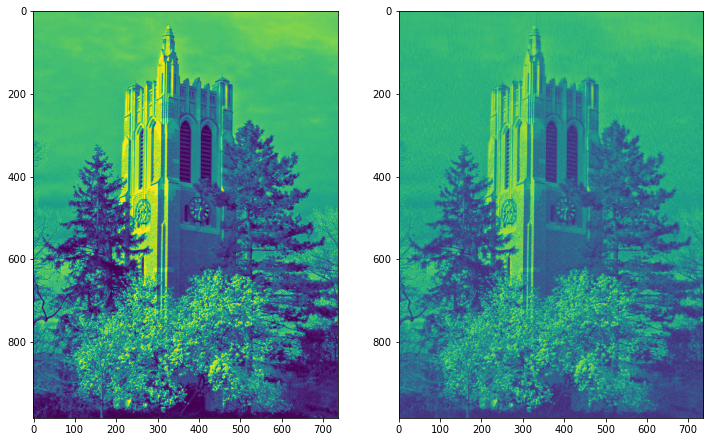

In [28]:
smaller = 0
a = 0
for i in range(150):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    smaller = smaller + a

f, axarr = plt.subplots(1,2,figsize=(12, 12))
axarr[0].imshow(red_X)
axarr[1].imshow(smaller)

So amusing, I still can't rap up my mind with this amazing concept. With just 150 dimensions out of 736 (approx 20%) we are able to generate almost 80 % details of our image. Is this an example of Pareto principle I wonder.😵‍💫

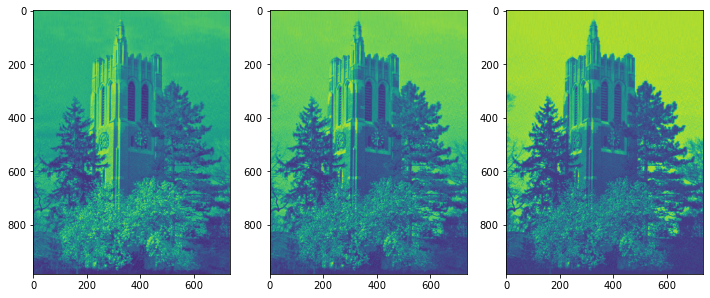

In [29]:
# generating images for all colors and plotting together.
smaller = 0
a = 0
smaller1 = 0
a1 = 0
smaller2 = 0
a2 = 0

for i in range(150):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    a1 = sg[i]*np.outer(ug[:,i],vg[:,i])
    a2 = sb[i]*np.outer(ub[:,i],vb[:,i])
    smaller = smaller + a
    smaller1 = smaller1 + a1
    smaller2 = smaller2 + a2

f, axarr = plt.subplots(1,3,figsize=(12, 12))
axarr[0].imshow(smaller)
axarr[1].imshow(smaller1)
axarr[2].imshow(smaller2)

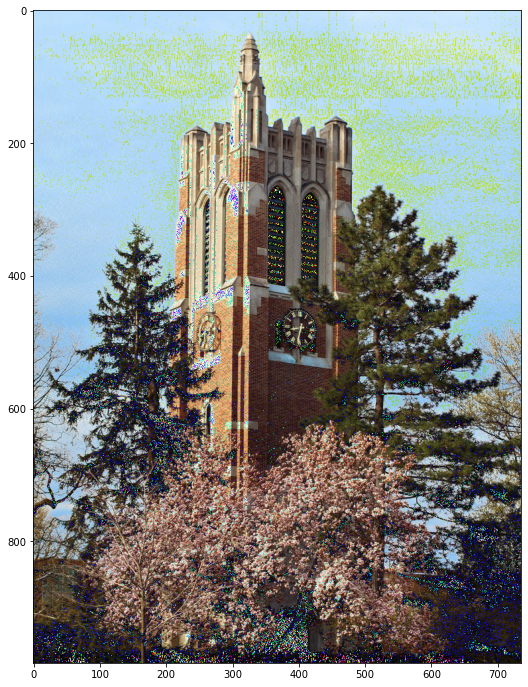

In [58]:
# Combining the RGB values to generate Image
smaller = 0
a = 0
smaller1 = 0
a1 = 0
smaller2 = 0
a2 = 0

for i in range(400):
    a = sr[i]*np.outer(ur[:,i],vr[:,i])
    a1 = sg[i]*np.outer(ug[:,i],vg[:,i])
    a2 = sb[i]*np.outer(ub[:,i],vb[:,i])
    smaller = smaller + a
    smaller1 = smaller1 + a1
    smaller2 = smaller2 + a2

image_small = np.dstack((smaller, smaller1, smaller2))
plt.figure(figsize=(12,12))
plt.imshow(image_small.astype('uint8'))